In [1]:
import os
from pathlib import Path
from PIL import Image, ImageDraw 
import matplotlib.pyplot as plt
from owslib.wmts import WebMapTileService
import mercantile

while ".git" not in os.listdir(os.getcwd()): prj_dir = os.chdir(Path(os.getcwd())/"..")
os.getcwd()

from utils.coords import * 

In [2]:
url = 'https://mapsneu.wien.gv.at/wmtsneu/1.0.0/WMTSCapabilities.xml'
wmts = WebMapTileService(url)

(16.3688, 48.2256, 16.371, 48.2269)
[150, 67, 1790, 1522]
(1640, 1455)


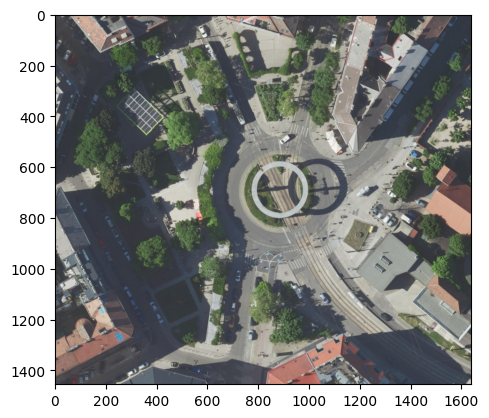

In [3]:
bbox_gauss = (16.3688, 48.2256, 16.371, 48.2269)
img = getImgFor(bbox_gauss, 20, wmts, layer = "lb")

print(img.size)

plt.imshow(img)
plt.show()

(16.368738412429956, 48.22557324856525, 16.370948552794836, 48.22689195388285)
[104, 76, 1752, 1552]


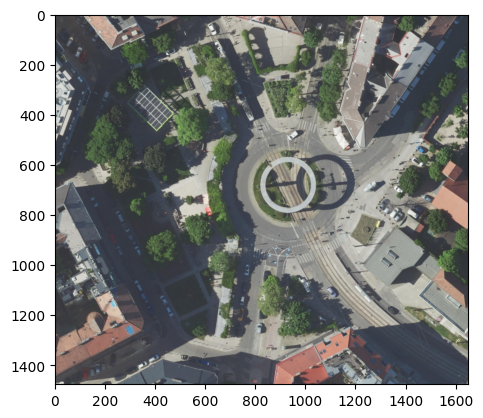

In [4]:
bbox_gauss = (1822159.6250, 6144464.5671, 1822405.6567, 6144684.9207)

img = getImgFor(bbox_gauss, 20, wmts, layer = "lb", epsg = 3857)

plt.imshow(img)
plt.show()

In [17]:
bbox =  (16.368691, 48.226922, 16.371143, 48.225581)
zoom = 20
epsg = 4326
layer = "lb"

tile_size = 256

tiles_img = {}
for tc in getTilesForBBox(bbox, zoom, epsg):
    tiles_img[tc] = getTileImg(tc, wmts, layer)

x_vals = [k[0] for k in tiles_img.keys()]
x_min, x_max = min(x_vals), max(x_vals)

y_vals = [k[1] for k in tiles_img.keys()]
y_min, y_max = min(y_vals), max(y_vals)

ws = mercantile.ul(x_min, y_min, zoom)
en = mercantile.ul(x_max + 1, y_max + 1, zoom)

west, south = mercantile.xy(ws.lng, ws.lat)
east, north = mercantile.xy(en.lng, en.lat)

bbox_tiles = (west, south, east, north)

img = Image.new('RGB', (256*(x_max-x_min+1), 256*(y_max-y_min+1)), "white")

for tc, i in tiles_img.items():
    img.paste(i, ((tc[0] - x_min)*tile_size, (tc[1] - y_min)*tile_size))


print('requested: ', bbox)
print('      got: ', bbox_tiles)

def toImgCoords(coord):
    x_0, x_1 = bbox_tiles[0], bbox_tiles[2]
    y_0, y_1 = bbox_tiles[3], bbox_tiles[1]
    return (
        round((coord[0] - x_0)/(x_1 - x_0)*img.size[0]),
        round((1 - (coord[1] - y_0)/(y_1 - y_0))*img.size[1]),
    )


if epsg == 4326:
    p1 = mercantile.xy(bbox[0], bbox[1])
    p2 = mercantile.xy(bbox[2], bbox[3])
else:
    p1 = (bbox[0], bbox[3])
    p2 = (bbox[2], bbox[1])

# imgDraw = ImageDraw.Draw(img)

# print(img.size)
# imgDraw.rectangle([toImgCoords((bbox[0], bbox[3])), toImgCoords((bbox[2], bbox[1]))],  outline ="red") 

print([toImgCoords(p1), toImgCoords(p2)])

im1 = img.crop([*toImgCoords(p1), *toImgCoords(p2)])

plt.imshow(im1)
plt.show()

ValueError: min() arg is an empty sequence